In [1]:
import sys
sys.path.append("/Users/ishimiwataru/Downloads/DNN_code_colab_lesson_1_2")
sys.path.append("/Users/ishimiwataru/Downloads/DNN_code_colab_lesson_1_2/lesson_2")

# optimizer
SGD

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13
                : 10. 正答率(テスト) = 0.0982
Generation: 20. 正答率(トレーニング) = 0.09
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.11
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.07
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.08
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.13
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.15
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.1
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.08
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.11
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.12
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.1
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.13
                : 130. 正答率(テスト) = 0.1135
Generatio

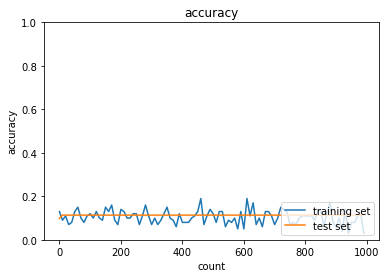

In [2]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# Momentum

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.0958
Generation: 20. 正答率(トレーニング) = 0.14
                : 20. 正答率(テスト) = 0.1028
Generation: 30. 正答率(トレーニング) = 0.12
                : 30. 正答率(テスト) = 0.101
Generation: 40. 正答率(トレーニング) = 0.1
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.13
                : 50. 正答率(テスト) = 0.1028
Generation: 60. 正答率(トレーニング) = 0.15
                : 60. 正答率(テスト) = 0.1595
Generation: 70. 正答率(トレーニング) = 0.15
                : 70. 正答率(テスト) = 0.1503
Generation: 80. 正答率(トレーニング) = 0.11
                : 80. 正答率(テスト) = 0.1028
Generation: 90. 正答率(トレーニング) = 0.24
                : 90. 正答率(テスト) = 0.2198
Generation: 100. 正答率(トレーニング) = 0.17
                : 100. 正答率(テスト) = 0.1953
Generation: 110. 正答率(トレーニング) = 0.27
                : 110. 正答率(テスト) = 0.2299
Generation: 120. 正答率(トレーニング) = 0.33
                : 120. 正答率(テスト) = 0.298
Generation: 130. 正答率(トレーニング) = 0.21
                : 130. 正答率(テスト) = 0.2777
Generation

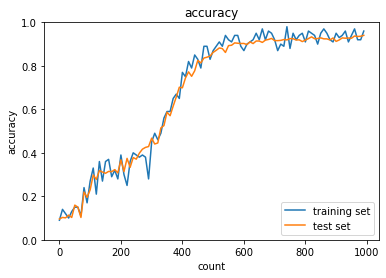

In [3]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.3
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# AdaGrad

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.11
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.17
                : 30. 正答率(テスト) = 0.1396
Generation: 40. 正答率(トレーニング) = 0.23
                : 40. 正答率(テスト) = 0.2276
Generation: 50. 正答率(トレーニング) = 0.32
                : 50. 正答率(テスト) = 0.2249
Generation: 60. 正答率(トレーニング) = 0.27
                : 60. 正答率(テスト) = 0.2287
Generation: 70. 正答率(トレーニング) = 0.25
                : 70. 正答率(テスト) = 0.2359
Generation: 80. 正答率(トレーニング) = 0.3
                : 80. 正答率(テスト) = 0.2246
Generation: 90. 正答率(トレーニング) = 0.31
                : 90. 正答率(テスト) = 0.2481
Generation: 100. 正答率(トレーニング) = 0.21
                : 100. 正答率(テスト) = 0.2743
Generation: 110. 正答率(トレーニング) = 0.26
                : 110. 正答率(テスト) = 0.224
Generation: 120. 正答率(トレーニング) = 0.22
                : 120. 正答率(テスト) = 0.2654
Generation: 130. 正答率(トレーニング) = 0.29
                : 130. 正答率(テスト) = 0.2524
Generatio

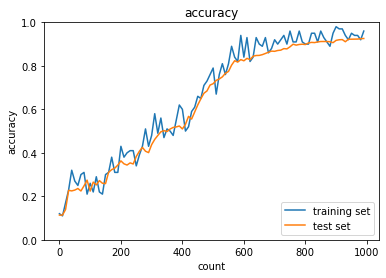

In [4]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.full_like(network.params[key], 1e-4)
        else:
            h[key] += np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]))

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# RMSprop

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.25
                : 10. 正答率(テスト) = 0.263
Generation: 20. 正答率(トレーニング) = 0.34
                : 20. 正答率(テスト) = 0.3185
Generation: 30. 正答率(トレーニング) = 0.45
                : 30. 正答率(テスト) = 0.3535
Generation: 40. 正答率(トレーニング) = 0.64
                : 40. 正答率(テスト) = 0.5334
Generation: 50. 正答率(トレーニング) = 0.62
                : 50. 正答率(テスト) = 0.5827
Generation: 60. 正答率(トレーニング) = 0.66
                : 60. 正答率(テスト) = 0.5863
Generation: 70. 正答率(トレーニング) = 0.69
                : 70. 正答率(テスト) = 0.6139
Generation: 80. 正答率(トレーニング) = 0.68
                : 80. 正答率(テスト) = 0.673
Generation: 90. 正答率(トレーニング) = 0.73
                : 90. 正答率(テスト) = 0.7168
Generation: 100. 正答率(トレーニング) = 0.75
                : 100. 正答率(テスト) = 0.7253
Generation: 110. 正答率(トレーニング) = 0.86
                : 110. 正答率(テスト) = 0.7697
Generation: 120. 正答率(トレーニング) = 0.9
                : 120. 正答率(テスト) = 0.8046
Generation: 130. 正答率(トレーニング) = 0.9
                : 130. 正答率(テスト) = 0.8251
Generation:

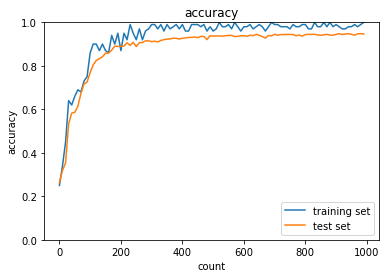

In [5]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# Adam

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.06
                : 10. 正答率(テスト) = 0.0958
Generation: 20. 正答率(トレーニング) = 0.09
                : 20. 正答率(テスト) = 0.1088
Generation: 30. 正答率(トレーニング) = 0.12
                : 30. 正答率(テスト) = 0.1492
Generation: 40. 正答率(トレーニング) = 0.11
                : 40. 正答率(テスト) = 0.1667
Generation: 50. 正答率(トレーニング) = 0.29
                : 50. 正答率(テスト) = 0.2628
Generation: 60. 正答率(トレーニング) = 0.3
                : 60. 正答率(テスト) = 0.254
Generation: 70. 正答率(トレーニング) = 0.36
                : 70. 正答率(テスト) = 0.3296
Generation: 80. 正答率(トレーニング) = 0.43
                : 80. 正答率(テスト) = 0.3845
Generation: 90. 正答率(トレーニング) = 0.48
                : 90. 正答率(テスト) = 0.4297
Generation: 100. 正答率(トレーニング) = 0.44
                : 100. 正答率(テスト) = 0.4415
Generation: 110. 正答率(トレーニング) = 0.45
                : 110. 正答率(テスト) = 0.4612
Generation: 120. 正答率(トレーニング) = 0.55
                : 120. 正答率(テスト) = 0.4426
Generation: 130. 正答率(トレーニング) = 0.45
                : 130. 正答率(テスト) = 0.5139
Generatio

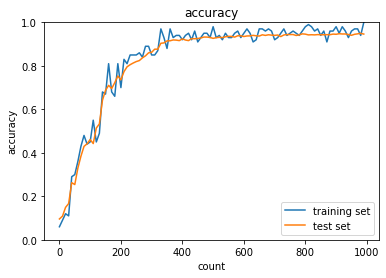

In [6]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# 活性感関数と重みの初期値を変更して違いを見てみよう
 RELU ー　 He

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.73
                : 10. 正答率(テスト) = 0.7244
Generation: 20. 正答率(トレーニング) = 0.81
                : 20. 正答率(テスト) = 0.8172
Generation: 30. 正答率(トレーニング) = 0.87
                : 30. 正答率(テスト) = 0.8546
Generation: 40. 正答率(トレーニング) = 0.91
                : 40. 正答率(テスト) = 0.8769
Generation: 50. 正答率(トレーニング) = 0.87
                : 50. 正答率(テスト) = 0.8881
Generation: 60. 正答率(トレーニング) = 0.88
                : 60. 正答率(テスト) = 0.8969
Generation: 70. 正答率(トレーニング) = 0.93
                : 70. 正答率(テスト) = 0.8985
Generation: 80. 正答率(トレーニング) = 0.91
                : 80. 正答率(テスト) = 0.89
Generation: 90. 正答率(トレーニング) = 0.87
                : 90. 正答率(テスト) = 0.9192
Generation: 100. 正答率(トレーニング) = 0.93
                : 100. 正答率(テスト) = 0.9019
Generation: 110. 正答率(トレーニング) = 0.95
                : 110. 正答率(テスト) = 0.9253
Generation: 120. 正答率(トレーニング) = 0.95
                : 120. 正答率(テスト) = 0.9189
Generation: 130. 正答率(トレーニング) = 0.94
                : 130. 正答率(テスト) = 0.9255
Generatio

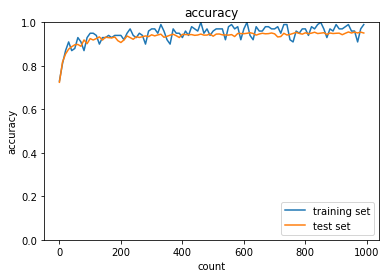

In [7]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std="He",
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.68
                : 10. 正答率(テスト) = 0.7057
Generation: 20. 正答率(トレーニング) = 0.81
                : 20. 正答率(テスト) = 0.8241
Generation: 30. 正答率(トレーニング) = 0.83
                : 30. 正答率(テスト) = 0.8649
Generation: 40. 正答率(トレーニング) = 0.93
                : 40. 正答率(テスト) = 0.8878
Generation: 50. 正答率(トレーニング) = 0.93
                : 50. 正答率(テスト) = 0.9049
Generation: 60. 正答率(トレーニング) = 0.94
                : 60. 正答率(テスト) = 0.9077
Generation: 70. 正答率(トレーニング) = 0.9
                : 70. 正答率(テスト) = 0.9128
Generation: 80. 正答率(トレーニング) = 0.9
                : 80. 正答率(テスト) = 0.9175
Generation: 90. 正答率(トレーニング) = 0.96
                : 90. 正答率(テスト) = 0.9236
Generation: 100. 正答率(トレーニング) = 0.96
                : 100. 正答率(テスト) = 0.9244
Generation: 110. 正答率(トレーニング) = 0.94
                : 110. 正答率(テスト) = 0.9244
Generation: 120. 正答率(トレーニング) = 0.98
                : 120. 正答率(テスト) = 0.9246
Generation: 130. 正答率(トレーニング) = 0.96
                : 130. 正答率(テスト) = 0.9307
Generatio

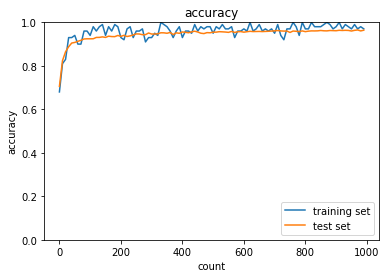

In [9]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std="He",
                       use_batchnorm=True)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()